In [7]:
import time
import torch
from matplotlib import pyplot as plt
import pandas as pd

use_cuda = torch.cuda.is_available()
dtype = torch.float32 if use_cuda else torch.float64

K-means for the Euclidean metric with 10,000 points in dimension 2, K = 50:
Timing for 10 iterations: 0.14000s = 10 x 0.01400s



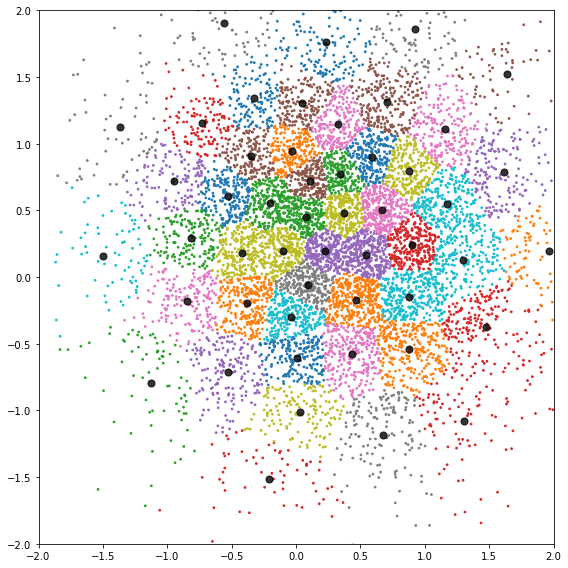

In [8]:
def KMeans(x, K=10, Niter=10, verbose=True):
    """Implements Lloyd's algorithm for the Euclidean metric."""

    start = time.time()
    N, D = x.shape  # Number of samples, dimension of the ambient space

    c = x[:K, :].clone()  # Simplistic initialization for the centroids

    x_i = x.view(N, 1, D)  # (N, 1, D) samples
    c_j = c.view(1, K, D)  # (1, K, D) centroids

    # K-means loop:
    # - x  is the (N, D) point cloud,
    # - cl is the (N,) vector of class labels
    # - c  is the (K, D) cloud of cluster centroids
    for i in range(Niter):

        # E step: assign points to the closest cluster -------------------------
        D_ij = ((x_i - c_j) ** 2).sum(-1)  # (N, K) symbolic squared distances
        cl = D_ij.argmin(dim=1).long().view(-1)  # Points -> Nearest cluster

        # M step: update the centroids to the normalized cluster average: ------
        # Compute the sum of points per cluster:
        c.zero_()
        c.scatter_add_(0, cl[:, None].repeat(1, D), x)

        # Divide by the number of points per cluster:
        Ncl = torch.bincount(cl, minlength=K).type_as(c).view(K, 1)
        c /= Ncl  # in-place division to compute the average

    if verbose:  # Fancy display -----------------------------------------------
        if use_cuda:
            torch.cuda.synchronize()
        end = time.time()
        print(
            f"K-means for the Euclidean metric with {N:,} points in dimension {D:,}, K = {K:,}:"
        )
        print(
            "Timing for {} iterations: {:.5f}s = {} x {:.5f}s\n".format(
                Niter, end - start, Niter, (end - start) / Niter
            )
        )

    return cl, c

N, D, K = 10000, 2, 50

x = 0.7 * torch.randn(N, D, dtype=dtype) + 0.3

cl, c = KMeans(x, K)

plt.figure(figsize=(8, 8))
plt.scatter(x[:, 0].cpu(), x[:, 1].cpu(), c=cl.cpu(), s=30000 / len(x), cmap="tab10")
plt.scatter(c[:, 0].cpu(), c[:, 1].cpu(), c="black", s=50, alpha=0.8)
plt.axis([-2, 2, -2, 2])
plt.tight_layout()
plt.show()

In [50]:
data = pd.read_csv('Fabi/master_dataset.csv', sep=',')

schools = torch.tensor([data['Longitude'].values, data['Latitude'].values])
mask = schools > 0
schools = schools[mask[0,:]]

plt.figure(figsize=(8, 8))
plt.scatter(schools[:, 0].cpu(), schools[:, 1].cpu(), c="black", s=50, alpha=0.8)
#print(schools > 0)
#schools = torch.nonzero(schools[schools> 0])
#plt.axis([150.3, 150.7, -33.16, -34])
plt.tight_layout()
plt.show() 

IndexError: The shape of the mask [2218] at index 0 does not match the shape of the indexed tensor [2, 2218] at index 0

In [51]:
x = torch.randn(10, 2)
condition = x > 0.
row_cond = condition.all(1)
x[row_cond, :]

tensor([[1.7321, 1.6589],
        [0.9031, 1.1274],
        [0.8614, 1.2979],
        [0.0475, 0.0638]])